## IMPORTING ALL THE MODULES


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

### IMPORTING TESTING AND TRAINING DATA

In [117]:
training_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

### CLEANING THE DATA


In [118]:
print(training_data.isna().sum())
training_data = training_data.drop(columns="Cabin" , axis=1)
training_data.loc[(training_data.Age.isnull())&(training_data['Survived']==0), 'Age']=training_data.loc[(training_data.Age.notnull())&(training_data['Survived']==0), 'Age'].median()
training_data.loc[(training_data.Age.isnull())&(training_data['Survived']==1), 'Age']=training_data.loc[(training_data.Age.notnull())&(training_data['Survived']==1), 'Age'].median()
training_data['Embarked'].fillna(training_data['Embarked'].mode()[0] , inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [119]:
print(training_data.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [120]:
training_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
X = training_data.drop(columns=['PassengerId' , 'Name' , 'Ticket' , 'Survived'] , axis=1)
Y = training_data['Survived']


In [121]:
test_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
test_data.drop(columns=['PassengerId' , 'Name' , 'Ticket' , 'Cabin'] , axis=1 , inplace=True)
test_data["Fare"].fillna(test_data['Embarked'].mode()[0] , inplace=True)
test_data["Age"].fillna(test_data["Age"].mean() , inplace=True)
test_data["age_age"] = test_data.Age**2
test_data["Pclass_Fare"] = test_data.Pclass * test_data.Fare
test_data["Fare_Fare"] = test_data.Fare **2

In [122]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_age,Pclass_Fare,Fare_Fare
0,3,0,34.5,0,0,7.8292,2,1190.25,23.4876,61.296373
1,3,1,47.0,1,0,7.0000,0,2209.00,21.0000,49.000000
2,2,0,62.0,0,0,9.6875,2,3844.00,19.3750,93.847656
3,3,0,27.0,0,0,8.6625,0,729.00,25.9875,75.038906
4,3,1,22.0,1,1,12.2875,0,484.00,36.8625,150.982656


In [123]:
columnNames = ['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch' , 'Fare' , 'Embarked' , 'age_age' , 'Pclass_fare' , 'Fare_Fare' ]

### adding features


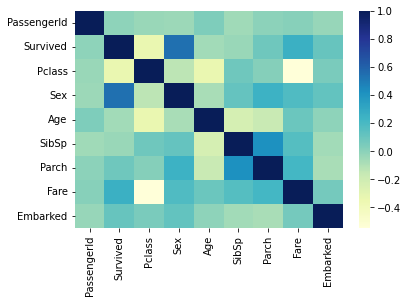

In [124]:
sns.heatmap(training_data.corr() , cmap='YlGnBu' )
plt.show()

In [125]:
X['age_age'] = X.Age **2
X["Pclass_Fare"] = X.Pclass * X.Fare
X["Fare_Fare"] = X.Fare **2

In [126]:
X.shape

(891, 10)

### Feature Scaling

In [127]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
print(X.shape)
X_train_scaled = pd.DataFrame(X,columns = columnNames)


(891, 10)


In [128]:
test_data = scaler.fit_transform(test_data)
test_scaled_data = pd.DataFrame(test_data , columns= columnNames)

In [129]:
X_train_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_age,Pclass_fare,Fare_Fare
0,0.827377,-0.737695,-0.565736,0.432793,-0.473674,-0.502445,-0.568837,-0.611586,-0.577965,-0.199305
1,-1.566107,1.355574,0.663861,0.432793,-0.473674,0.786845,1.005181,0.460931,0.382936,0.091101
2,0.827377,1.355574,-0.258337,-0.474545,-0.473674,-0.488854,-0.568837,-0.397083,-0.538682,-0.198713
3,-1.566107,1.355574,0.433312,0.432793,-0.473674,0.420730,-0.568837,0.216263,0.030196,-0.039510
4,0.827377,-0.737695,0.433312,-0.474545,-0.473674,-0.486337,-0.568837,0.216263,-0.531407,-0.198598


In [130]:
test_scaled_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_age,Pclass_fare,Fare_Fare
0,0.873482,-0.755929,0.334993,-0.499470,-0.400248,-0.496637,2.243165,0.129678,-0.536793,-0.250083
1,0.873482,1.322876,1.325530,0.616992,-0.400248,-0.511497,-0.677841,1.282763,-0.581406,-0.250796
2,-0.315819,-0.755929,2.514175,-0.499470,-0.400248,-0.463335,2.243165,3.133359,-0.610550,-0.248197
3,0.873482,-0.755929,-0.259330,-0.499470,-0.400248,-0.481704,-0.677841,-0.392393,-0.491958,-0.249287
4,0.873482,1.322876,-0.655545,0.616992,0.619896,-0.416740,-0.677841,-0.669700,-0.296920,-0.244886


## train test split

In [131]:
X_train , X_test , Y_train , Y_test = train_test_split(X_train_scaled,Y , test_size =0.3 , random_state = 42)

## Logistic Regression

In [132]:
algo1 = LogisticRegression()
algo1.fit(X_train , Y_train)
print(algo1.score(X_train , Y_train))
print(algo1.score(X_test , Y_test))

0.812199036918138
0.8022388059701493


### Prediction

In [133]:
pred1 = algo1.predict(test_scaled_data)


### Saving Result


In [134]:
sub = pd.read_csv("gender_submission.csv")
sub['Survived'] = pred1.astype('int')
sub.to_csv('Submission.csv' , index = False)


## Decision Tree

In [135]:
algo2 = DecisionTreeClassifier(random_state=15 , max_depth = 8)
algo2.fit(X_train,Y_train)
print(algo2.score(X_train , Y_train))
print(algo2.score(X_test , Y_test))


0.913322632423756
0.7910447761194029


### Prediction

In [136]:
pred2 = algo2.predict(test_scaled_data)

### Saving the results

In [137]:
sub = pd.read_csv("gender_submission.csv")
sub['Survived'] = pred2.astype('int')
sub.to_csv('Submission2.csv' , index = False)

## Random Forest

In [138]:
algo3 = RandomForestClassifier(random_state=2, max_depth= 9  )
algo3.fit(X_train,Y_train)
print(algo3.score(X_train , Y_train))
print(algo3.score(X_test , Y_test))


0.9390048154093098
0.8097014925373134


### Prediction

In [139]:
pred3 = algo3.predict(test_scaled_data)

### Saving the Results

In [140]:
sub = pd.read_csv("gender_submission.csv")
sub['Survived'] = pred3.astype('int')
sub.to_csv('Submission3.csv' , index = False)